In [1]:
import kagglehub

spliced_path = kagglehub.dataset_download("erentahir/dis25k")
ai_path = path = kagglehub.dataset_download("gpch2159/ai-vs-human-syn-imgs-v2-partial")
path = kagglehub.dataset_download("tristanzhang32/ai-generated-images-vs-real-images")

print("Path to dataset files:", spliced_path)



100%|██████████| 1.39G/1.39G [00:17<00:00, 83.2MB/s]

Extracting files...


100%|██████████| 1.41G/1.41G [00:12<00:00, 122MB/s]

Extracting files...


100%|██████████| 48.4G/48.4G [12:00<00:00, 72.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/erentahir/dis25k/versions/1


In [42]:
import os
import pandas as pd

images_dir = os.path.join(spliced_path, 'DIS25k', 'images')

if os.path.exists(images_dir):
    all_files = sorted([f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Load 3000 files (2000 Train + 500 Val + 500 Test)
    subset_files = all_files[:3000]

    file_paths = [os.path.join(images_dir, f) for f in subset_files]

    df_spliced_images = pd.DataFrame({'image_path': file_paths})

    print(f"Total images found in directory: {len(all_files)}")
    print(f"Images loaded into DataFrame: {len(df_spliced_images)}")
    display(df_spliced_images.head())

else:
    print(f"Directory not found: {images_dir}")

    if os.path.exists(spliced_path):
        print(f"Contents of {spliced_path}:")
        print(os.listdir(spliced_path))

Total images found in directory: 24964
Images loaded into DataFrame: 3000


,image_path
0,/root/.cache/kagglehub/datasets/erentahir/dis2...
1,/root/.cache/kagglehub/datasets/erentahir/dis2...
2,/root/.cache/kagglehub/datasets/erentahir/dis2...
3,/root/.cache/kagglehub/datasets/erentahir/dis2...
4,/root/.cache/kagglehub/datasets/erentahir/dis2...


In [43]:
images_dir = os.path.join(ai_path, 'stabilityai.stable-diffusion-xl-refiner-1.0_0.5_12_2025.02.25_05.15.08_846327')

if os.path.exists(images_dir):
    all_files = sorted([f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Load 3000 files (2000 Train + 500 Val + 500 Test)
    subset_files = all_files[:3000]

    file_paths = [os.path.join(images_dir, f) for f in subset_files]

    df_ai_images = pd.DataFrame({'image_path': file_paths})

    print(f"Total images found in directory: {len(all_files)}")
    print(f"Images loaded into DataFrame: {len(df_ai_images)}")
    display(df_ai_images.head())

else:
    print(f"Directory not found: {images_dir}")

    if os.path.exists(spliced_path):
        print(f"Contents of {spliced_path}:")
        print(os.listdir(spliced_path))

Total images found in directory: 30440
Images loaded into DataFrame: 3000


,image_path
0,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...
1,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...
2,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...
3,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...
4,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...


In [44]:
images_dir = os.path.join(path, 'train', 'real')

if os.path.exists(images_dir):
    all_files = sorted([f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Filter out known corrupt files
    all_files = [f for f in all_files if f != '0038.jpg']

    # Load 3000 files (2000 Train + 500 Val + 500 Test)
    subset_files = all_files[:3000]

    file_paths = [os.path.join(images_dir, f) for f in subset_files]

    df_real_images = pd.DataFrame({'image_path': file_paths})

    print(f"Total images found in directory: {len(all_files)}")
    print(f"Images loaded into DataFrame: {len(df_real_images)}")
    display(df_real_images.head())

else:
    print(f"Directory not found: {images_dir}")

    if os.path.exists(spliced_path):
        print(f"Contents of {spliced_path}:")
        print(os.listdir(spliced_path))

Total images found in directory: 23999
Images loaded into DataFrame: 3000


,image_path
0,/root/.cache/kagglehub/datasets/tristanzhang32...
1,/root/.cache/kagglehub/datasets/tristanzhang32...
2,/root/.cache/kagglehub/datasets/tristanzhang32...
3,/root/.cache/kagglehub/datasets/tristanzhang32...
4,/root/.cache/kagglehub/datasets/tristanzhang32...


In [45]:
from sklearn.model_selection import train_test_split

def split_dataset(df):
    # First split: Train (2000) and Temp (1000)
    train, temp = train_test_split(df, train_size=2000, test_size=1000, random_state=42)
    # Second split: Temp (1000) into Val (500) and Test (500)
    val, test = train_test_split(temp, train_size=500, test_size=500, random_state=42)
    return train, val, test

# Split Spliced Images
train_spliced, val_spliced, test_spliced = split_dataset(df_spliced_images)

# Split AI Images
train_ai, val_ai, test_ai = split_dataset(df_ai_images)

# Split Real Images
train_real, val_real, test_real = split_dataset(df_real_images)

# Verify the splits
print(f"Spliced Train: {len(train_spliced)}, Val: {len(val_spliced)}, Test: {len(test_spliced)}")
print(f"AI Train: {len(train_ai)}, Val: {len(val_ai)}, Test: {len(test_ai)}")
print(f"Real Train: {len(train_real)}, Val: {len(val_real)}, Test: {len(test_real)}")

Spliced Train: 2000, Val: 500, Test: 500
AI Train: 2000, Val: 500, Test: 500
Real Train: 2000, Val: 500, Test: 500


In [46]:
from sklearn.utils import shuffle

# Add labels to the dataframes (using .copy() to avoid SettingWithCopyWarning)
train_spliced = train_spliced.copy()
val_spliced = val_spliced.copy()
test_spliced = test_spliced.copy()

train_spliced['label'] = 'spliced'
val_spliced['label'] = 'spliced'
test_spliced['label'] = 'spliced'

train_ai = train_ai.copy()
val_ai = val_ai.copy()
test_ai = test_ai.copy()

train_ai['label'] = 'ai'
val_ai['label'] = 'ai'
test_ai['label'] = 'ai'

train_real = train_real.copy()
val_real = val_real.copy()
test_real = test_real.copy()

train_real['label'] = 'real'
val_real['label'] = 'real'
test_real['label'] = 'real'

# Concatenate and shuffle
train_df = pd.concat([train_spliced, train_ai, train_real], ignore_index=True)
train_df = shuffle(train_df, random_state=42).reset_index(drop=True)

val_df = pd.concat([val_spliced, val_ai, val_real], ignore_index=True)
val_df = shuffle(val_df, random_state=42).reset_index(drop=True)

test_df = pd.concat([test_spliced, test_ai, test_real], ignore_index=True)
test_df = shuffle(test_df, random_state=42).reset_index(drop=True)

# Verify
print(f"Combined Train Set: {len(train_df)} images")
print(train_df['label'].value_counts())
print("-" * 20)
print(f"Combined Validation Set: {len(val_df)} images")
print(val_df['label'].value_counts())
print("-" * 20)
print(f"Combined Test Set: {len(test_df)} images")
print(test_df['label'].value_counts())

display(train_df.head())

Combined Train Set: 6000 images
label
spliced    2000
ai         2000
real       2000
Name: count, dtype: int64
--------------------
Combined Validation Set: 1500 images
label
real       500
spliced    500
ai         500
Name: count, dtype: int64
--------------------
Combined Test Set: 1500 images
label
real       500
spliced    500
ai         500
Name: count, dtype: int64


,image_path,label
0,/root/.cache/kagglehub/datasets/erentahir/dis2...,spliced
1,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...,ai
2,/root/.cache/kagglehub/datasets/erentahir/dis2...,spliced
3,/root/.cache/kagglehub/datasets/gpch2159/ai-vs...,ai
4,/root/.cache/kagglehub/datasets/tristanzhang32...,real


In [47]:
from torchvision import transforms
from PIL import Image
import torch
import numpy as np

# Training transform: minimal transformations (Resize + Normalize only)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation/Test transform: no augmentation, just resize + normalize
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [48]:
from torch.utils.data import Dataset
from PIL import Image
import torch

class ImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        # Define label mapping
        self.label_map = {'real': 0, 'ai': 1, 'spliced': 2}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Use iloc to access the row by integer index
        row = self.df.iloc[idx]
        image_path = row['image_path']
        label_str = row['label']

        # Load image
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image at {image_path}: {e}")
            # Return a black image or handle appropriately.
            # Here we'll generate a dummy image to prevent crashing,
            # but in production you might want to skip or raise.
            image = Image.new('RGB', (224, 224))

        if self.transform:
            image = self.transform(image)

        label = self.label_map.get(label_str, -1)

        return image, label

In [49]:
train_dataset = ImageDataset(train_df, transform=train_transform)
val_dataset = ImageDataset(val_df, transform=val_transform)
test_dataset = ImageDataset(test_df, transform=val_transform)

In [50]:
import torchvision.models as models
import torch.nn as nn
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA for acceleration")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS for acceleration")
else:
    device = torch.device("cpu")
    print("Using CPU")


resnet50 = models.resnet50(pretrained=True)


#num_classes = len(label_encoder.classes_)

resnet50.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(resnet50.fc.in_features, 3)
)

resnet50 = resnet50.to(device)

# Weighted Loss as requested
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.5, 0.5, 1.5]).to(device))

# Differential Learning Rates
optimizer = optim.Adam([
    {'params': resnet50.layer4.parameters(), 'lr': 1e-5},
    {'params': resnet50.fc.parameters(), 'lr': 1e-3}
], weight_decay=1e-4)


scheduler = StepLR(optimizer, step_size=5, gamma=0.1)


for param in resnet50.parameters():
    param.requires_grad = True

print("Model is ready to train!")

Using CUDA for acceleration


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model is ready to train!


In [51]:
import torch
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Mixed precision scaler
scaler = GradScaler()

num_epochs = 3
best_val_loss = float('inf')
patience = 7
patience_counter = 0

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    # Training Phase with Progress Bar
    resnet50.train()
    train_running_loss, correct, total = 0.0, 0, 0
    train_progress_bar = tqdm(train_loader, desc="Training", leave=False)

    for inputs, labels in train_progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Mixed precision forward pass
        with autocast():
            outputs = resnet50(inputs)
            loss = criterion(outputs, labels)

        # Mixed precision backward pass
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Metrics
        train_running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        train_progress_bar.set_postfix(loss=loss.item(), accuracy=100 * correct / total)

    train_loss = train_running_loss / len(train_loader)
    train_acc = 100 * correct / total
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

    # Validation Phase with Progress Bar
    resnet50.eval()
    val_running_loss, val_correct, val_total = 0.0, 0, 0
    val_progress_bar = tqdm(val_loader, desc="Validation", leave=False)

    with torch.no_grad():
        for inputs, labels in val_progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            with autocast():
                outputs = resnet50(inputs)
                loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            val_progress_bar.set_postfix(loss=loss.item(), accuracy=100 * val_correct / val_total)

    val_loss = val_running_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.2f}%")

    # Save best model based on validation loss + early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(resnet50.state_dict(), "best_resnet50_model.pth")
        print(f"Saved best model! (val_loss: {val_loss:.4f})")
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch}.")
            break

    scheduler.step()

/tmp/ipython-input-1840623761.py:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/3


Training:   0%|          | 0/375 [00:00<?, ?it/s]/tmp/ipython-input-1840623761.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training:  62%|██████▏   | 234/375 [02:59<02:05,  1.12it/s, accuracy=78.6, loss=0.129]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (98058240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Train Loss: 0.3450 | Train Accuracy: 82.13%


Validation:   0%|          | 0/94 [00:00<?, ?it/s]/tmp/ipython-input-1840623761.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Validation Loss: 0.2340 | Validation Accuracy: 92.47%
Saved best model! (val_loss: 0.2340)
Epoch 2/3


Train Loss: 0.1723 | Train Accuracy: 92.35%


Validation Loss: 0.1121 | Validation Accuracy: 94.07%
Saved best model! (val_loss: 0.1121)
Epoch 3/3


Train Loss: 0.0915 | Train Accuracy: 95.65%


Validation Loss: 0.1040 | Validation Accuracy: 94.80%
Saved best model! (val_loss: 0.1040)


Loading the best model for testing...



Test Loss: 0.1066 | Test Accuracy: 96.27%


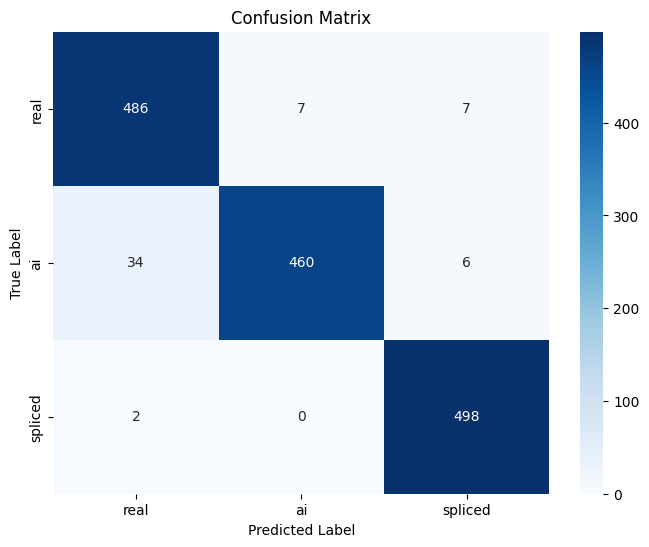

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def test_model(model, test_loader, device, model_path):

    print("Loading the best model for testing...")

    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    model.eval()

    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    criterion = nn.CrossEntropyLoss()

    all_preds = []
    all_labels = []

    test_progress_bar = tqdm(test_loader, desc="Testing", leave=False)

    with torch.no_grad():
        for inputs, labels in test_progress_bar:

            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            # Collect predictions and labels for confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            test_progress_bar.set_postfix(loss=loss.item(), accuracy=100 * test_correct / test_total)

    test_loss = test_running_loss / len(test_loader)
    test_acc = 100 * test_correct / test_total

    print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

    # Generate Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['real', 'ai', 'spliced'],
                yticklabels=['real', 'ai', 'spliced'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return test_loss, test_acc



test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
test_loss, test_acc = test_model(resnet50, test_loader, device, "best_resnet50_model.pth")

In [53]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import torchvision.models as models

# Re-instantiate the model structure
resnet50_inference = models.resnet50(pretrained=False)
resnet50_inference.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(resnet50_inference.fc.in_features, 3)
)

# Load the saved state dictionary
resnet50_inference.load_state_dict(torch.load("best_resnet50_model.pth"))
resnet50_inference.eval() # Set model to evaluation mode

# Move model to the correct device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
resnet50_inference = resnet50_inference.to(device)

print(f"Model loaded successfully on {device}!")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model loaded successfully on cuda!


In [57]:
# Define the transformations for a single image (similar to ImageTransform, but without augmentation)
inference_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the image
image_path = "/content/Screenshot_20260214-144506_1.png"
image = Image.open(image_path).convert('RGB')

# Apply transformations
input_tensor = inference_transform(image)
input_batch = input_tensor.unsqueeze(0) # Create a mini-batch as expected by the model

# Move to the same device as the model
input_batch = input_batch.to(device)

# Make prediction
with torch.no_grad():
    output = resnet50_inference(input_batch)

# Get the predicted class
probabilities = torch.nn.functional.softmax(output[0], dim=0)
predicted_class_idx = torch.argmax(probabilities).item()

# Reverse the label mapping to get the class name
label_map = {'real': 0, 'ai': 1, 'spliced': 2}
reverse_label_map = {v: k for k, v in label_map.items()}
predicted_label = reverse_label_map[predicted_class_idx]

print(f"Predicted class for {image_path}: {predicted_label} (Probability: {probabilities[predicted_class_idx].item():.4f})")


Predicted class for /content/Screenshot_20260214-144506_1.png: real (Probability: 0.5596)
